In [1]:
import pandas as pd 


import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics

import xgboost as xgb
import scikitplot as skplt

In [2]:
df= pd.read_csv('./data/positive_emotion_dataset.csv').drop(columns='Unnamed: 0')
df

,ad,pos_emo
0,i am proud and excited to be your mayor\nalex ...,1
1,proud to work with rep andy kim to secure mil...,1
2,in recent days i have received many questions ...,1
3,this is a fantastic idea we need to stopkavan...,1
4,in these deeply divided times connecting commu...,1
...,...,...
19995,from maggie thatcher to theresa may i know whi...,0
19996,vote is available in many areas across north ...,0
19997,you have to register before you can vote,0
19998,dana balter would put washington bureaucrats i...,0


In [3]:
X_train,  X_test, y_train, y_test  = train_test_split(df['ad'], df['pos_emo'], test_size =0.2  , random_state = 42)

In [10]:
# Use term frequency to represent documents
tf_vectorizer = TfidfVectorizer() 

X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

In [11]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train_tf, y_train)

C:\Users\elfraiha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:02:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

accuracy:   0.958
              precision    recall  f1-score   support

  no-pos_emo       0.93      0.99      0.96      1981
     pos_emo       0.99      0.92      0.96      2019

    accuracy                           0.96      4000
   macro avg       0.96      0.96      0.96      4000
weighted avg       0.96      0.96      0.96      4000

confusion matrix:
[[1970   11]
 [ 157 1862]]



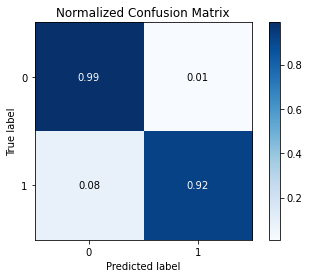

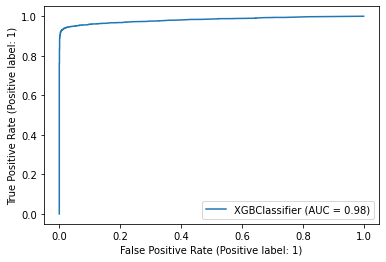

In [12]:
# predict the labels on validation dataset
predictions = xgb_clf.predict(X_test_tf)

# compute the performance measures
score1 = metrics.accuracy_score(y_test, predictions)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, predictions, target_names=['no-pos_emo', 'pos_emo']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, predictions))
print()
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)
plt.show()
svc_disp = metrics.RocCurveDisplay.from_estimator(xgb_clf, X_test_tf, y_test)

In [8]:
df_val = pd.read_csv('./data/sample_positive_emotion.csv')
df_val

,ad,pos_emo
0,see why everyone is celebrating at hoblit dodg...,1
1,help give people without a home a chance to le...,0
2,i am so proud of what this grassroots team has...,1
3,we have until march 31st to raise money for ou...,0
4,learn how to use the new staffing law to impro...,0
...,...,...
120,blood donation saves lives\nthis cannot be sai...,0
121,over 10000 palestinians have been forced left ...,0
122,palestine emergency appeal 53 palestinians inc...,0
123,let is build cameroon wake up cameroonians and...,1


accuracy:   0.728
              precision    recall  f1-score   support

      no-pos       0.80      0.87      0.83        98
         pos       0.32      0.22      0.26        27

    accuracy                           0.73       125
   macro avg       0.56      0.54      0.55       125
weighted avg       0.70      0.73      0.71       125

confusion matrix:
[[85 13]
 [21  6]]



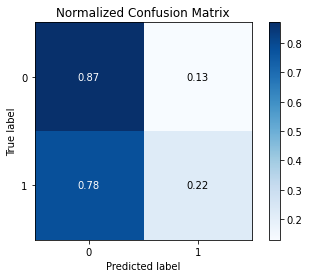

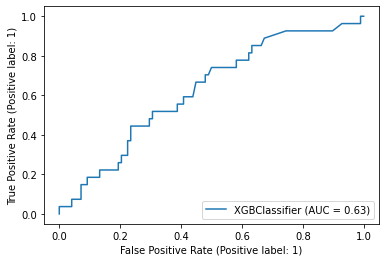

In [13]:
X_val = tf_vectorizer.transform(df_val['ad'])
y_val = df_val['pos_emo']

y_pred = xgb_clf.predict(X_val)

score = metrics.accuracy_score(y_val, y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_val, y_pred, target_names=[ 'no-pos', 'pos']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_val, y_pred))
print()

skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(xgb_clf, X_val, y_val)